In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.optimizers import Adam

In [2]:
data = pd.read_csv('Project34.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [3]:
data.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [4]:
#we need to check if we have missing values in our data :
data.count()

HomePage                           14578
HomePage_Duration                  14581
LandingPage                        14578
LandingPage_Duration               14596
ProductDescriptionPage             14608
ProductDescriptionPage_Duration    14564
GoogleMetric:Bounce Rates          14580
GoogleMetric:Exit Rates            14602
GoogleMetric:Page Values           14599
SeasonalPurchase                   14581
Month_SeasonalPurchase             14587
OS                                 14597
SearchEngine                       14609
Zone                               14614
Type of Traffic                    14588
CustomerType                       14587
Gender                             14586
Cookies Setting                    14587
Education                          14595
Marital Status                     14601
WeekendPurchase                    14610
Made_Purchase                      14731
dtype: int64

In [6]:
#we can see that we have a little bit of missing data , so we need to fix this , we can do this by using simple imputation , using the mean/median/mode :
numbers=data.select_dtypes(include='float').columns
other=data.select_dtypes(include='object').columns
data[numbers] = data[numbers].fillna(data[numbers].mean())
data[other] = data[other].fillna(data[other].mode().iloc[0])
data.count()


HomePage                           14731
HomePage_Duration                  14731
LandingPage                        14731
LandingPage_Duration               14731
ProductDescriptionPage             14731
ProductDescriptionPage_Duration    14731
GoogleMetric:Bounce Rates          14731
GoogleMetric:Exit Rates            14731
GoogleMetric:Page Values           14731
SeasonalPurchase                   14731
Month_SeasonalPurchase             14731
OS                                 14731
SearchEngine                       14731
Zone                               14731
Type of Traffic                    14731
CustomerType                       14731
Gender                             14731
Cookies Setting                    14731
Education                          14731
Marital Status                     14731
WeekendPurchase                    14731
Made_Purchase                      14731
dtype: int64

<ipython-input-20-a77e2d6763e9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data.corr())


<Figure size 4000x3000 with 0 Axes>

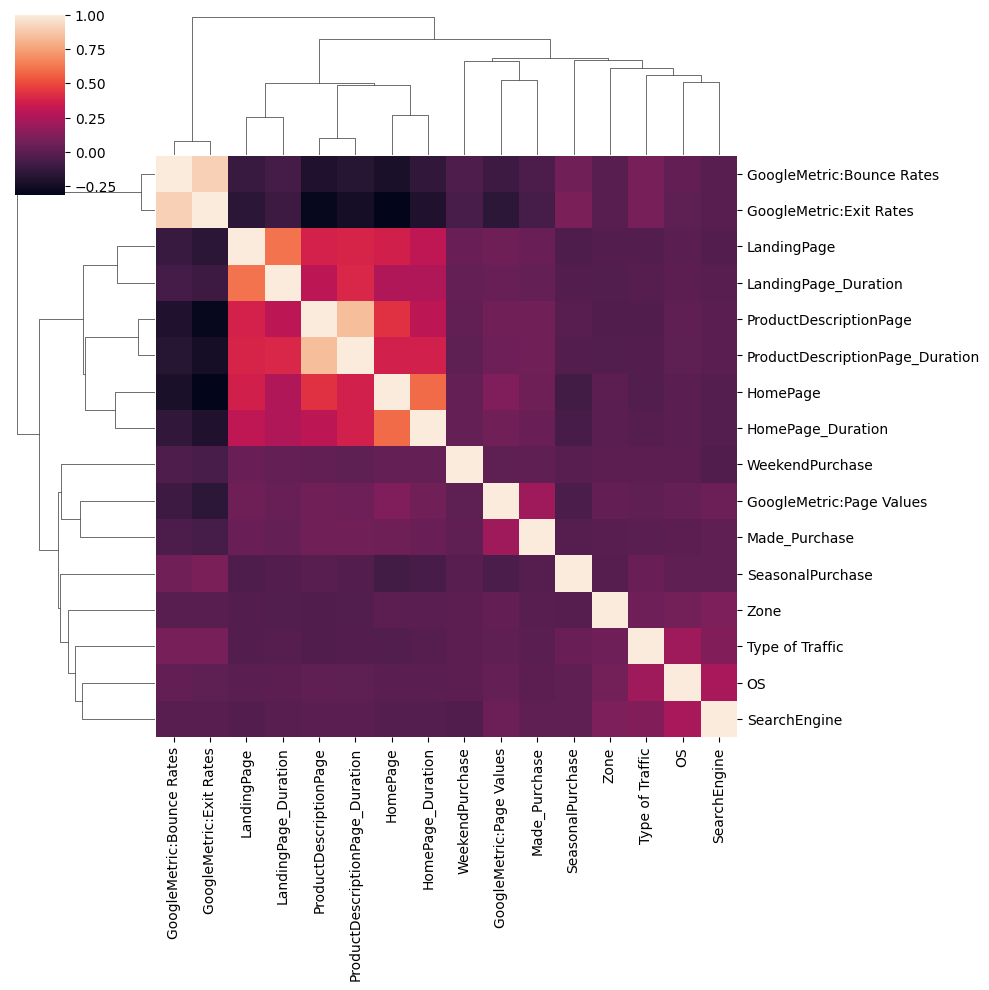

In [20]:
#now we see , that we have the same number of row for each column , this means that we can start analyzing the data. first we need to check for correlation in our data:
plt.figure(figsize=(40,30))
sns.clustermap(data.corr())


In [21]:
#we can see that the correlation between landingPage and LandingPage_Duration , and also for ProductDescriptionPage and ProductDescriptionPage_Duration is quite high , and also HomePage and Homepage_Duration is highly correlated , this means that we can drop them:

In [23]:
columns_to_drop = ['HomePage', 'LandingPage', 'ProductDescriptionPage']

data.drop(columns=columns_to_drop, inplace=True)

In [24]:
#check if the operation was executed properly:
data.count()

HomePage_Duration                  14731
LandingPage_Duration               14731
ProductDescriptionPage_Duration    14731
GoogleMetric:Bounce Rates          14731
GoogleMetric:Exit Rates            14731
GoogleMetric:Page Values           14731
SeasonalPurchase                   14731
Month_SeasonalPurchase             14731
OS                                 14731
SearchEngine                       14731
Zone                               14731
Type of Traffic                    14731
CustomerType                       14731
Gender                             14731
Cookies Setting                    14731
Education                          14731
Marital Status                     14731
WeekendPurchase                    14731
Made_Purchase                      14731
dtype: int64

<Axes: >

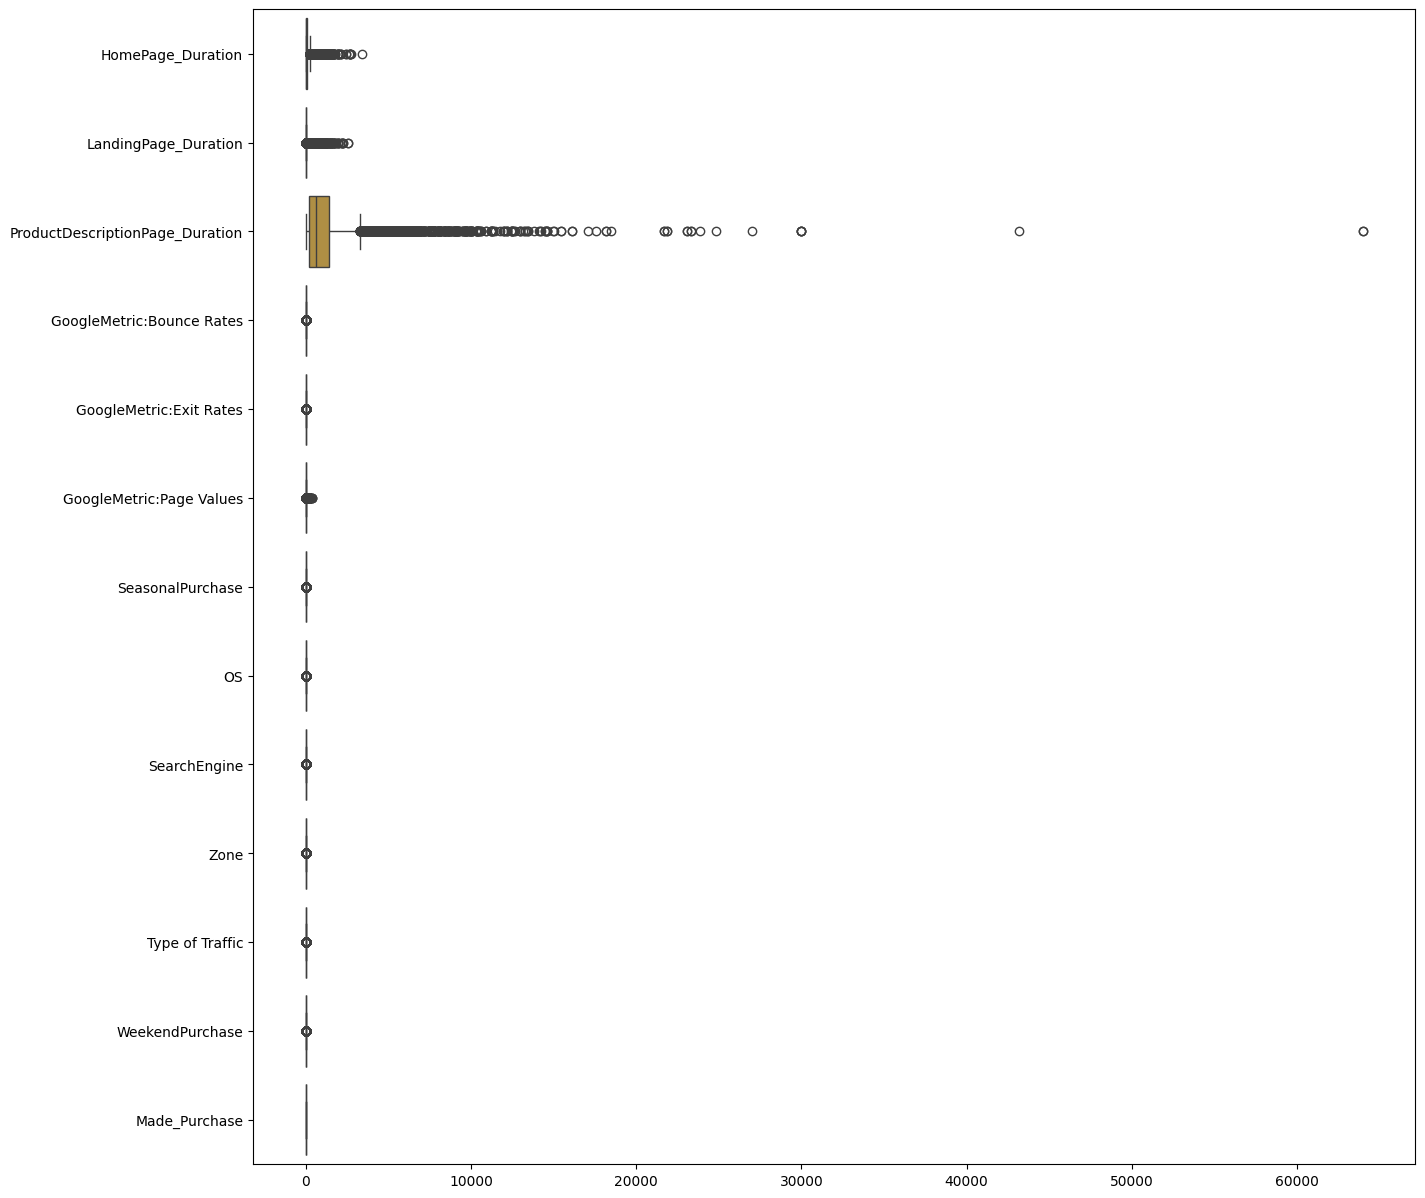

In [25]:
#now we should check for outliers:
from matplotlib import axes
plt.figure(figsize=(15,15))
sns.boxplot(data,orient='h')

In [28]:
#we can see that we have outliers in our data , so we will use the interquartile method to eliminate them

numeric_data = data.select_dtypes(include=['number'])

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5

outliers = ((numeric_data < (Q1 - threshold * IQR)) | (numeric_data > (Q3 + threshold * IQR))).any(axis=1)

outlier_indices = numeric_data[outliers].index

data = data[~outliers]

<Axes: >

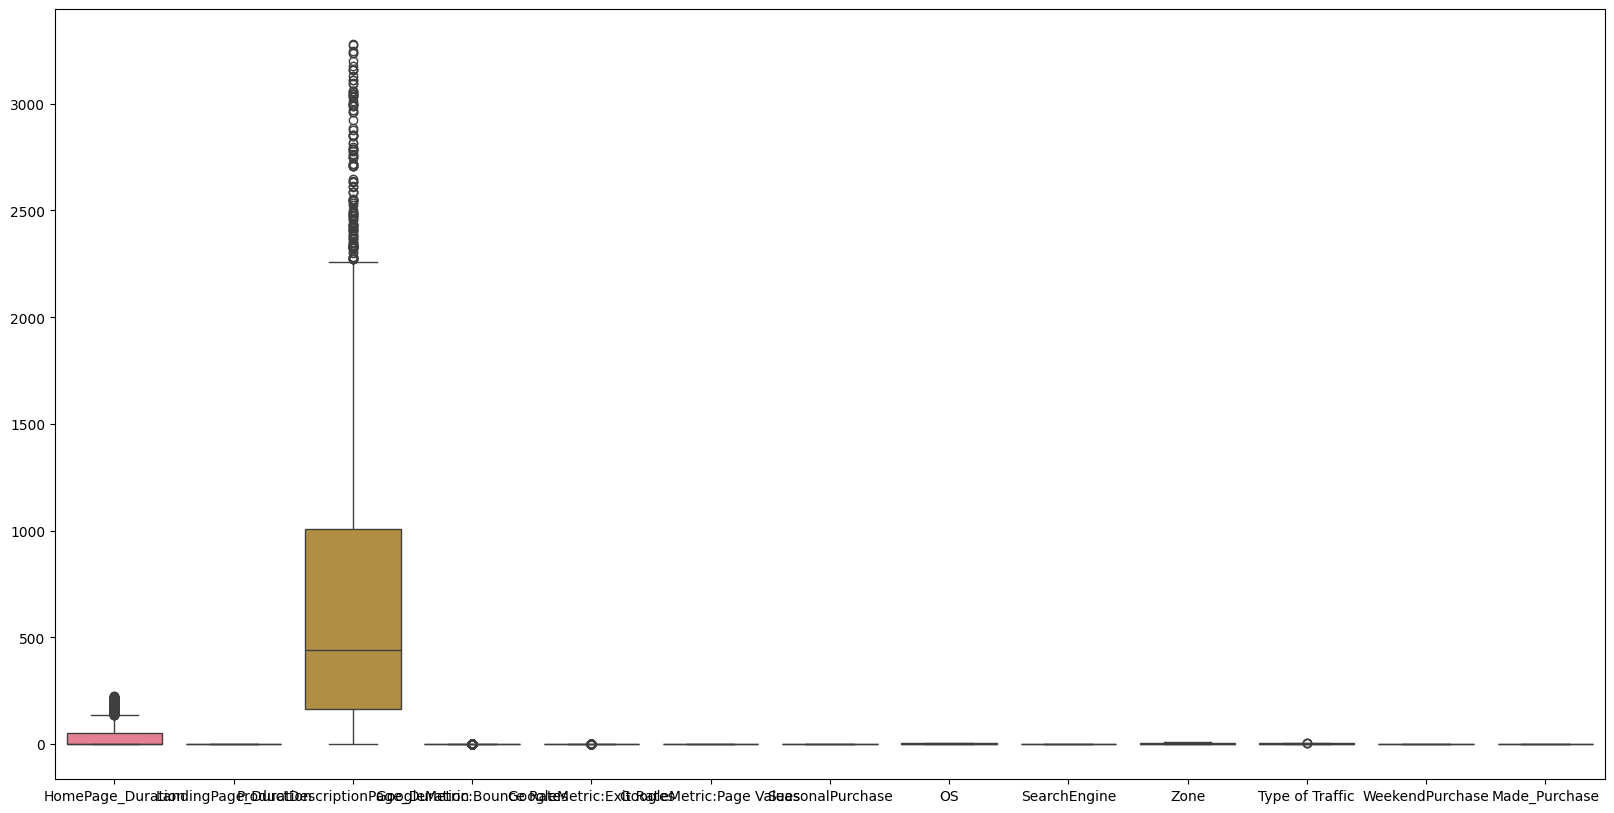

In [31]:
plt.figure(figsize=(20,10))
sns.boxplot(data)

In [32]:
#now we can create the prediction model:
target = "Made_Purchase"
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
principalComponents_train = (X_train)
principalComponents_test = (X_test)

In [48]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
numerical_cols = ['HomePage_Duration', 'LandingPage_Duration', 'ProductDescriptionPage_Duration', 'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates', 'GoogleMetric:Page Values', 'SeasonalPurchase', 'OS', 'SearchEngine', 'Zone', 'Type of Traffic', 'WeekendPurchase']
categorical_cols = ['CustomerType', 'Gender', 'Cookies Setting', 'Education', 'Marital Status']

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Standardize numeric columns
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode categorical columns
    ])

# Create a pipeline with preprocessing and Random Forest classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=0))])

# Fit the pipeline to the training data
pipeline.fit(principalComponents_train, y_train_encoded)

# Predict on train data to get train accuracy
Y_prediction = pipeline.predict(principalComponents_train)

# Calculate accuracy
acc_random_forest = round(pipeline.score(principalComponents_train, y_train_encoded) * 100, 2)
print(acc_random_forest)

81.71


In [50]:
predictions = pipeline.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[1230,   97],
       [ 260,  365]])

In [53]:
from sklearn import metrics
print(metrics.classification_report(y_train,predictions,digits=3))

              precision    recall  f1-score   support

       False      0.826     0.927     0.873      1327
        True      0.790     0.584     0.672       625

    accuracy                          0.817      1952
   macro avg      0.808     0.755     0.772      1952
weighted avg      0.814     0.817     0.809      1952



In [56]:
numerical_cols = ['HomePage_Duration', 'LandingPage_Duration', 'ProductDescriptionPage_Duration', 'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates', 'GoogleMetric:Page Values', 'SeasonalPurchase', 'OS', 'SearchEngine', 'Zone', 'Type of Traffic', 'WeekendPurchase']
categorical_cols = ['CustomerType', 'Gender', 'Cookies Setting', 'Education', 'Marital Status']

# Create preprocessor for numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Standardize numeric columns
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode categorical columns
    ])

# Create a pipeline with preprocessing and Gaussian Naive Bayes classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', GaussianNB())])

# Fit the pipeline to the training data
pipeline.fit(principalComponents_train, y_train)

# Predict on train data to get train accuracy
Y_prediction = pipeline.predict(principalComponents_train)

# Calculate accuracy
acc_gaussian = round(pipeline.score(principalComponents_train, y_train) * 100, 2)
print(acc_gaussian)

67.42


In [57]:
predictions_gauss = pipeline.predict(principalComponents_train)
confusion_matrix(y_train, predictions_gauss)

array([[1271,   56],
       [ 580,   45]])

In [58]:
from sklearn import metrics
print(metrics.classification_report(y_train,predictions_gauss,digits=3))

              precision    recall  f1-score   support

       False      0.687     0.958     0.800      1327
        True      0.446     0.072     0.124       625

    accuracy                          0.674      1952
   macro avg      0.566     0.515     0.462      1952
weighted avg      0.609     0.674     0.583      1952



In [102]:
numerical_cols = ['HomePage_Duration', 'LandingPage_Duration', 'ProductDescriptionPage_Duration', 'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates', 'GoogleMetric:Page Values', 'SeasonalPurchase', 'OS', 'SearchEngine', 'Zone', 'Type of Traffic', 'WeekendPurchase']
categorical_cols = ['CustomerType', 'Gender', 'Cookies Setting', 'Education', 'Marital Status']

# Create preprocessor for numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Standardize numeric columns
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode categorical columns
    ])

# DecisionTree
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier',DecisionTreeClassifier())])

# Fit the pipeline to the training data
pipeline.fit(principalComponents_train, y_train)

# Predict on train data to get train accuracy
Y_prediction = pipeline.predict(principalComponents_train)

# Calculate accuracy
acc_logistic = round(pipeline.score(principalComponents_train, y_train) * 100, 2)
print(acc_logistic)

81.71


In [103]:
predictions_logistic = pipeline.predict(principalComponents_train)
confusion_matrix(y_train, predictions_logistic)

array([[1322,    5],
       [ 352,  273]])

In [104]:
from sklearn import metrics
print(metrics.classification_report(y_train,predictions_logistic,digits=3))

              precision    recall  f1-score   support

       False      0.790     0.996     0.881      1327
        True      0.982     0.437     0.605       625

    accuracy                          0.817      1952
   macro avg      0.886     0.717     0.743      1952
weighted avg      0.851     0.817     0.793      1952



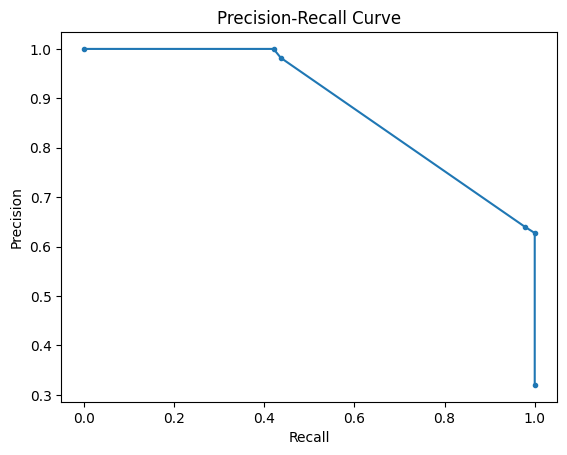

In [105]:
y_scores = pipeline.predict_proba(principalComponents_train)[:, 1]
y_scores_test_decision = pipeline.predict_proba(principalComponents_test)[:, 1]
acc_decision_test = round(pipeline.score(principalComponents_test, y_test) * 100, 2)
precision, recall, thresholds = precision_recall_curve(y_train, y_scores)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

67.42
              precision    recall  f1-score   support

       False      0.687     0.958     0.800      1327
        True      0.446     0.072     0.124       625

    accuracy                          0.674      1952
   macro avg      0.566     0.515     0.462      1952
weighted avg      0.609     0.674     0.583      1952



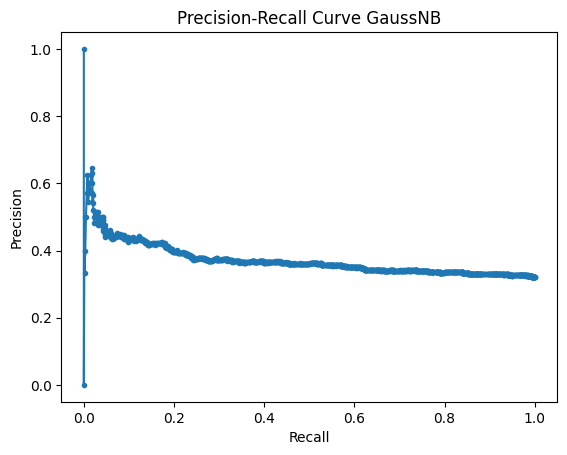

In [106]:
numerical_cols = ['HomePage_Duration', 'LandingPage_Duration', 'ProductDescriptionPage_Duration', 'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates', 'GoogleMetric:Page Values', 'SeasonalPurchase', 'OS', 'SearchEngine', 'Zone', 'Type of Traffic', 'WeekendPurchase']
categorical_cols = ['CustomerType', 'Gender', 'Cookies Setting', 'Education', 'Marital Status']

# Create preprocessor for numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Standardize numeric columns
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode categorical columns
    ])

# Create a pipeline with preprocessing and Gaussian Naive Bayes classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', GaussianNB())])

# Fit the pipeline to the training data
pipeline.fit(principalComponents_train, y_train)

# Predict on train data to get train accuracy
Y_prediction = pipeline.predict(principalComponents_train)

# Calculate accuracy
acc_gaussian = round(pipeline.score(principalComponents_train, y_train) * 100, 2)
print(acc_gaussian)

predictions_gauss = pipeline.predict(principalComponents_train)
confusion_matrix(y_train, predictions_gauss)

from sklearn import metrics
print(metrics.classification_report(y_train,predictions_gauss,digits=3))

y_scores = pipeline.predict_proba(principalComponents_train)[:, 1]
y_scores_test_gauss = pipeline.predict_proba(principalComponents_test)[:, 1]
acc_gauss_test = round(pipeline.score(principalComponents_test, y_test) * 100, 2)

precision, recall, thresholds = precision_recall_curve(y_train, y_scores)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve GaussNB')
plt.show()


81.71
              precision    recall  f1-score   support

       False      0.826     0.927     0.873      1327
        True      0.790     0.584     0.672       625

    accuracy                          0.817      1952
   macro avg      0.808     0.755     0.772      1952
weighted avg      0.814     0.817     0.809      1952



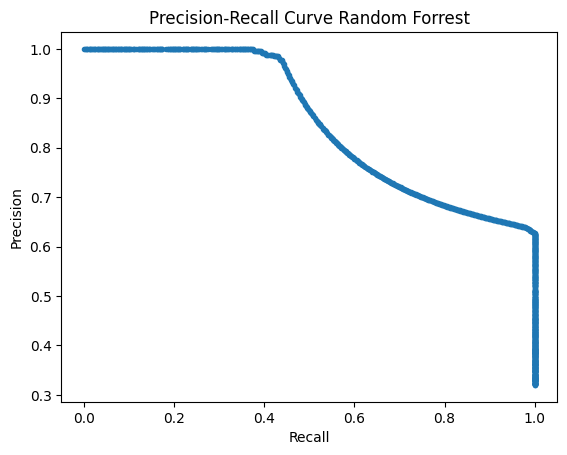

In [107]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
numerical_cols = ['HomePage_Duration', 'LandingPage_Duration', 'ProductDescriptionPage_Duration', 'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates', 'GoogleMetric:Page Values', 'SeasonalPurchase', 'OS', 'SearchEngine', 'Zone', 'Type of Traffic', 'WeekendPurchase']
categorical_cols = ['CustomerType', 'Gender', 'Cookies Setting', 'Education', 'Marital Status']

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Standardize numeric columns
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode categorical columns
    ])

# Create a pipeline with preprocessing and Random Forest classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=0))])

# Fit the pipeline to the training data
pipeline.fit(principalComponents_train, y_train_encoded)

# Predict on train data to get train accuracy
Y_prediction = pipeline.predict(principalComponents_train)

# Calculate accuracy
acc_random_forest = round(pipeline.score(principalComponents_train, y_train_encoded) * 100, 2)
print(acc_random_forest)

predictions = pipeline.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

from sklearn import metrics
print(metrics.classification_report(y_train,predictions,digits=3))

y_scores = pipeline.predict_proba(principalComponents_train)[:, 1]
y_scores_test_forrest = pipeline.predict_proba(principalComponents_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_train, y_scores)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Random Forrest')
plt.show()

In [109]:
acc_random_forest_test = round(pipeline.score(principalComponents_test, y_test) * 100, 2)

results = pd.DataFrame({
    'Model': [
              'Random Forest',
              'GaussianNB',
              'Decision Tree'
              ],
    'Score': [ acc_random_forest_test, acc_gauss_test, acc_decision_test ]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(9)

,Score
Model,
GaussianNB,65.16
Random Forest,52.25
Decision Tree,47.75
